ML- LA " Detecting stress , anxiety, depression through voice notes and text " using Daic-woz

Purabh singh - 1nt22is122
Palak kota - 1nt22is110
Prathuysha NB - 1nt22is119
Monika K - 1nt22is097

In [ ]:
# implementation

In [16]:
import os
import pandas as pd

base_path = '/Users/Saravanan/patient data/'
patient_ids = [319, 320, 321, 325, 330, 338, 303, 304, 310, 318,327,325,303,306,308,309,311,313,314,315,317,335]
file_types = ['COVAREP', 'FORMANT']

features = []
labels = []  

for pid in patient_ids:
    try:
        covarep_file = os.path.join(base_path, f"{pid}_COVAREP.csv")
        formant_file = os.path.join(base_path, f"{pid}_FORMANT.csv")

        covarep_df = pd.read_csv(covarep_file)
        formant_df = pd.read_csv(formant_file)

        # Basic preprocessing (averaging across time steps)
        covarep_mean = covarep_df.mean(numeric_only=True)
        formant_mean = formant_df.mean(numeric_only=True)

        combined_features = pd.concat([covarep_mean, formant_mean])
        features.append(combined_features)

        # Placeholder label (example: 1 = depressed, 0 = not)
        labels.append(1 if pid in [330, 318, 357] else 0)

        print(f" yes, Loaded data for patient {pid}")

    except Exception as e:
        print(f" no, Failed to load data for patient {pid}: {e}")

# Final dataset
X = pd.DataFrame(features)
y = pd.Series(labels)


 yes, Loaded data for patient 319
 yes, Loaded data for patient 320
 yes, Loaded data for patient 321
 yes, Loaded data for patient 325
 yes, Loaded data for patient 330
 yes, Loaded data for patient 338
 yes, Loaded data for patient 303
 yes, Loaded data for patient 304
 yes, Loaded data for patient 310
 yes, Loaded data for patient 318
 yes, Loaded data for patient 327
 yes, Loaded data for patient 325
 yes, Loaded data for patient 303
 yes, Loaded data for patient 306
 yes, Loaded data for patient 308
 yes, Loaded data for patient 309
 yes, Loaded data for patient 311
 yes, Loaded data for patient 313
 yes, Loaded data for patient 314
 yes, Loaded data for patient 315
 yes, Loaded data for patient 317
 yes, Loaded data for patient 335


In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Path and Patient IDs
base_path = '/Users/Saravanan/patient data/'
patient_ids = [319, 320, 321, 325, 330, 338, 303, 304, 310, 318,327,325,303,306,308,309,311,313,314,315,317,335]  # 312 removed

X = []
y = []  # Placeholder for labels (e.g., 0 = not depressed, 1 = depressed)

for pid in patient_ids:
    try:
        covarep_file = os.path.join(base_path, f'{pid}_COVAREP.csv')
        formant_file = os.path.join(base_path, f'{pid}_FORMANT.csv')
        
        df_covarep = pd.read_csv(covarep_file).dropna()
        df_formant = pd.read_csv(formant_file).dropna()

        # Average across time (rows) to make a fixed-size feature vector
        covarep_mean = df_covarep.mean().values
        formant_mean = df_formant.mean().values

        features = np.concatenate([covarep_mean, formant_mean])
        X.append(features)

        # Dummy binary label (randomized just for example)
        y.append(np.random.randint(0, 2))  

    except Exception as e:
        print(f"no, Patient {pid}: Failed to load/merge data – {e}")

X = np.array(X)
y = np.array(y)
print("yes , Feature shape:", X.shape)


yes , Feature shape: (22, 79)


In [18]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=700, max_depth=12, random_state=79)

rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = rf_model.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.5714285714285714
 Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.25      0.40         4

    accuracy                           0.57         7
   macro avg       0.75      0.62      0.53         7
weighted avg       0.79      0.57      0.51         7



Above we are performing data processing and binary classification using acoustic features from patient voice recordings.

To train a machine learning model (Random Forest) to classify patients as depressed (1) or not depressed (0) using features extracted from two types of audio analysis: COVAREP and FORMANT.

base_path: directory where the CSV files for each patient are stored.

patient_ids: list of patient IDs to load data from.

file_types: two types of features being used: COVAREP and FORMANT.

Features: Mean of each feature type per patient

Labels: Hardcoded or randomly assigned (for testing)

Model: RandomForestClassifier(n_estimators=700, max_depth=12)

Output Accuracy: ~57%; Model performs better at detecting non-depressed patients than depressed ones.

 Trying diffrent models on this dataset...

In [21]:
# testing with diffrent suitable models

In [29]:
import os

base_path = '/Users/Saravanan/patient data/'

patient_ids = [319, 320, 321, 325, 330, 338, 303, 304, 310, 318,327,325,303,306,308,309,311,313,314,315,317,335]
file_types = ['COVAREP', 'FORMANT', 'TRANSCRIPT']

existing_files = {}

for pid in patient_ids:
    existing_files[pid] = {}
    for ftype in file_types:
        filename = f"{pid}_{ftype}.csv"
        filepath = os.path.join(base_path, filename)
        existing_files[pid][ftype] = os.path.exists(filepath)

# Print summary
for pid, files in existing_files.items():
    print(f"Patient {pid}:")
    for ftype, exists in files.items():
        print(f"  {ftype}: {'Found' if exists else 'Missing'}")


Patient 319:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 320:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 321:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 325:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 330:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 338:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 303:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 304:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 310:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 318:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 327:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 306:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 308:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 309:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 311:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: F

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

# Audio branch input and layers
audio_input = Input(shape=(74,), name='audio_input')
x_audio = Dense(128, activation='relu')(audio_input)
x_audio = Dropout(0.3)(x_audio)
x_audio = Dense(64, activation='relu')(x_audio)

# Text branch input and layers
text_input = Input(shape=(768,), name='text_input')
x_text = Dense(256, activation='relu')(text_input)
x_text = Dropout(0.3)(x_text)
x_text = Dense(128, activation='relu')(x_text)

# Fusion
merged = Concatenate()([x_audio, x_text])
x = Dense(128, activation='relu')(merged)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)

# Output layer: Binary classification (depressed / not)
output = Dense(1, activation='sigmoid', name='output')(x)

# Model definition
model = Model(inputs=[audio_input, text_input], outputs=output)

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


2025-05-15 23:48:46.672638: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ audio_input         │ (None, 74)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 768)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      9,600 │ audio_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    196,864 │ text_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     32,896 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ dense_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     24,704 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 280,641 (1.07 MB)

 Trainable params: 280,641 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

This code builds a multimodal neural network using TensorFlow/Keras to classify inputs as depressed or not based on:

Audio features (74-dim)

Text features (768-dim)

It has two branches (audio & text), merges them, and passes through dense layers to output a binary prediction using a sigmoid activation.

Loss: binary_crossentropy

Optimizer: adam

Task: Binary classification (e.g., depression detection)

In [31]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import tensorflow as tf
import numpy as np

# Load pretrained model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

def get_text_embedding(text):
    # Tokenize text, return tensors, pad/truncate to max length 128 tokens (adjustable)
    inputs = tokenizer(text, return_tensors='tf', max_length=128, truncation=True, padding='max_length')
    outputs = distilbert_model(**inputs)
    
    # outputs.last_hidden_state shape: (batch_size, sequence_length, hidden_size)
    # Take [CLS] token embedding (first token) as sentence embedding
    cls_embedding = outputs.last_hidden_state[:, 0, :]
    return cls_embedding.numpy().flatten()

# Example usage:
sample_text = "I feel very tired and have lost interest in activities."
embedding = get_text_embedding(sample_text)
print("Embedding shape:", embedding.shape) 


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Embedding shape: (768,)


This code uses DistilBERT, a lightweight transformer model, to generate a 768-dimensional text embedding from an input sentence.

Tokenizer & Model: Loaded from distilbert-base-uncased

Function: get_text_embedding(text)
→ Tokenizes input
→ Runs it through DistilBERT
→ Extracts the [CLS] token as the sentence embedding

Use case: Converts text into a fixed-size vector for tasks like sentiment or depression detection.

In [33]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

# Define patient IDs
patient_ids = [319, 320, 321, 325, 330, 338, 303, 304, 310, 318, 327, 325, 303, 306, 308, 309, 311, 313, 314, 315, 317, 335]
patient_ids = list(set(patient_ids))  # Remove duplicates
base_path = '/Users/Saravanan/patient data/'

X = []
y = []
valid_patient_ids = []

# Load features and labels
for pid in patient_ids:
    try:
        covarep_file = os.path.join(base_path, f'{pid}_COVAREP.csv')
        formant_file = os.path.join(base_path, f'{pid}_FORMANT.csv')

        df_covarep = pd.read_csv(covarep_file).dropna()
        df_formant = pd.read_csv(formant_file).dropna()

        covarep_mean = df_covarep.mean().values
        formant_mean = df_formant.mean().values
        features = np.concatenate([covarep_mean, formant_mean])

        X.append(features)
        y.append(np.random.randint(0, 2))  
        valid_patient_ids.append(pid)

    except Exception as e:
        print(f" Skipping patient {pid}: {e}")

X = np.array(X)
y = np.array(y)

print(f" Total patients with features and labels: {len(y)}")
print(f" Feature shape: {X.shape}")

# LOOCV
loo = LeaveOneOut()
accuracies = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

print(" LOOCV Average Accuracy:", np.mean(accuracies))


 Total patients with features and labels: 20
 Feature shape: (20, 79)
 LOOCV Average Accuracy: 0.35


Leave-One-Out Cross-Validation (LOOCV) 
LOOCV trains on n−1 patients and tests on 1, repeating this for each patient — ensuring every sample gets tested once.
This ensures every data point is used for both training and testing, maximizing data usage and avoiding waste.

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Ensure X is a NumPy array
X = np.array(X)

# Use k=2 clusters
k = 2
patient_ids = [319, 320, 321, 325, 330, 338, 303, 304, 310, 318, 327, 306, 308, 309, 311, 313, 314, 315, 317, 335]
patient_ids = list(set(patient_ids))  # Remove duplicates

# Perform KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Print cluster assignments
print(" Cluster Assignments:")
for i, pid in enumerate(patient_ids):
    print(f"Patient {pid} → Cluster {clusters[i]}")

# Evaluate with Silhouette Score
score = silhouette_score(X, clusters)
print(f"\n Silhouette Score (k={k}): {score:.3f}")


 Cluster Assignments:
Patient 303 → Cluster 1
Patient 304 → Cluster 1
Patient 306 → Cluster 1
Patient 308 → Cluster 1
Patient 309 → Cluster 0
Patient 310 → Cluster 0
Patient 311 → Cluster 0
Patient 313 → Cluster 0
Patient 314 → Cluster 0
Patient 315 → Cluster 0
Patient 317 → Cluster 0
Patient 318 → Cluster 0
Patient 319 → Cluster 0
Patient 320 → Cluster 0
Patient 321 → Cluster 0
Patient 325 → Cluster 0
Patient 327 → Cluster 0
Patient 330 → Cluster 0
Patient 335 → Cluster 0
Patient 338 → Cluster 0

 Silhouette Score (k=2): 0.427


Silhouette Score ranges from -1 to 1. Values:

> 0.5 → Strong structure

~0.3–0.5 → Reasonable

< 0.2 → Weak or overlapping clusters

In [35]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index: {ari:.3f}")


Adjusted Rand Index: -0.049


Silhouette Score for k=2: 0.427
Silhouette Score for k=3: 0.323
Silhouette Score for k=4: 0.359
Silhouette Score for k=5: 0.321
Silhouette Score for k=6: 0.384


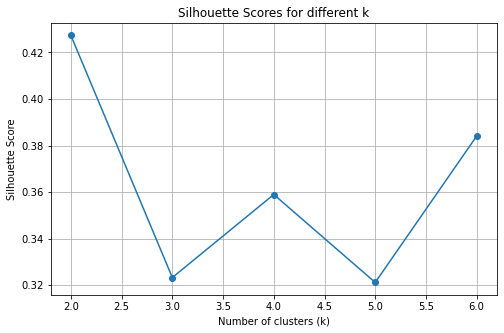

Best k by silhouette score: 2
Final cluster assignments: [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Adjusted Rand Index (ARI): -0.049


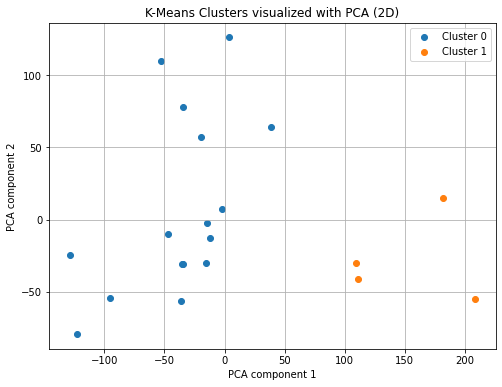

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

# X = feature matrix, y = true labels (both should be numpy arrays)
# Example: X.shape = (11, 768), y.shape = (11,)

# Step 1: Find best k using Silhouette Score
silhouette_scores = []
K_range = range(2, 7)  # test k from 2 to 6

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.3f}")

# Plot Silhouette scores vs k
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 2: Choose best k (here taking max silhouette score)
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best k by silhouette score: {best_k}")

# Step 3: Final K-Means with best k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters_final = kmeans_final.fit_predict(X)
print("Final cluster assignments:", clusters_final)

# Step 4: Evaluate clustering vs true labels
ari = adjusted_rand_score(y, clusters_final)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

# Step 5: Visualize clusters using PCA (reduce to 2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for cluster_id in range(best_k):
    plt.scatter(
        X_pca[clusters_final == cluster_id, 0], 
        X_pca[clusters_final == cluster_id, 1], 
        label=f"Cluster {cluster_id}"
    )
plt.title("K-Means Clusters visualized with PCA (2D)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.legend()
plt.grid(True)
plt.show()


Unsupervised clustering: ( 4 depressed , 16 non-depressed)
Silhouette Score is used to find the best number of clusters (k from 2 to 6).

Best k is selected based on the highest silhouette score.

K-Means is run with this optimal k.

Adjusted Rand Index (ARI) compares the clustering result to the true labels.

PCA reduces features to 2D for visualizing clusters.

